In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
%matplotlib inline

In [48]:
import skfuzzy as fuzz

In [57]:
arr1 = np.arange(11)
arr2 = np.arange(11)
mfx1 = fuzz.trimf(arr1, [0, 5, 10])
mfx2 = fuzz.trimf(arr1, [1, 6, 11])

In [58]:
print ("One: ", arr1, mfx1)
print ("Two: ", arr2, mfx2)

One:  [ 0  1  2  3  4  5  6  7  8  9 10] [0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]
Two:  [ 0  1  2  3  4  5  6  7  8  9 10] [0.  0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2]


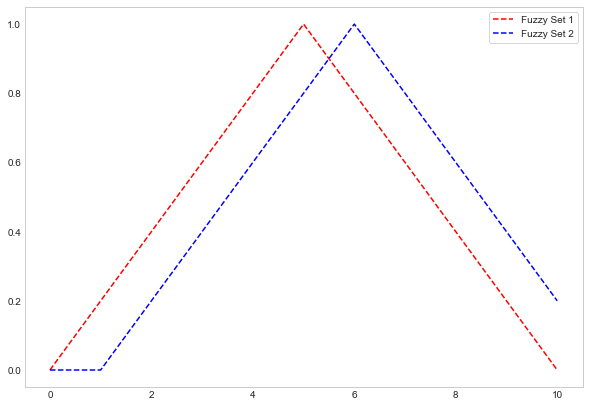

In [62]:
plt.figure(figsize=(10,7))
#plt.plot(arr1, 'r-', label='x1')
#plt.plot(arr2, 'b-', label='x2')
plt.plot(mfx1, 'r--', label='Fuzzy Set 1')
plt.plot(mfx2, 'b--', label='Fuzzy Set 2')
plt.legend(frameon=True)
plt.show()

## Union

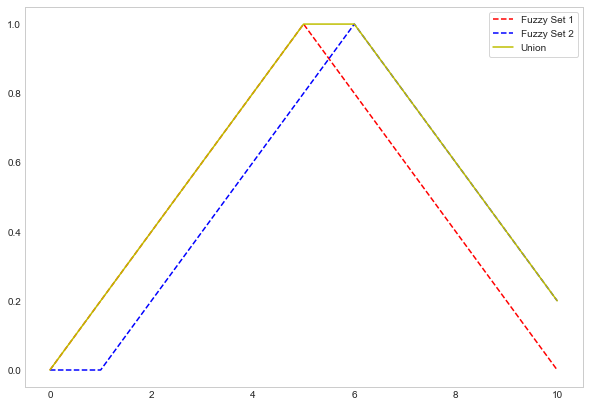

In [61]:
plt.figure(figsize=(10,7))
arr3, mfx3 = fuzz.fuzzy_or(arr1, mfx1, arr2, mfx2)
plt.plot(mfx1, 'r--', label='Fuzzy Set 1')
plt.plot(mfx2, 'b--', label='Fuzzy Set 2')
plt.plot(mfx3, 'y', label='Union')
plt.legend(frameon=True)
plt.show()

## Intersection

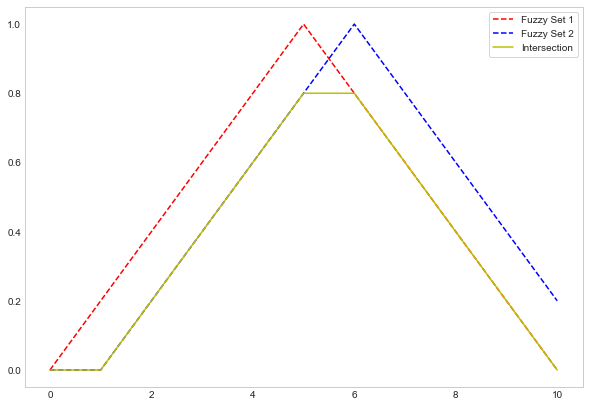

In [64]:
plt.figure(figsize=(10,7))
arr3, mfx3 = fuzz.fuzzy_and(arr1, mfx1, arr2, mfx2)
plt.plot(mfx1, 'r--', label='Fuzzy Set 1')
plt.plot(mfx2, 'b--', label='Fuzzy Set 2')
plt.plot(mfx3, 'y', label='Intersection')
plt.legend(frameon=True)
plt.show()

## Complement

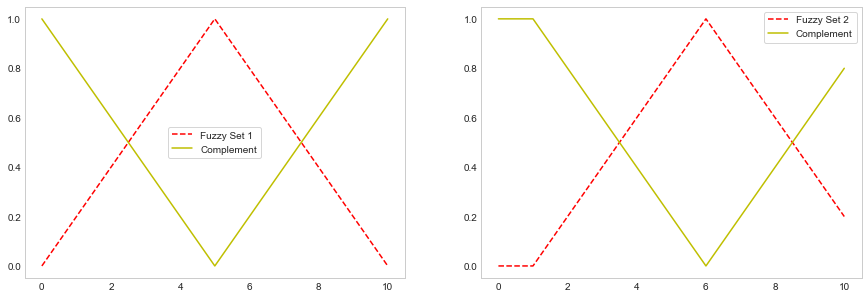

In [83]:
figure, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(mfx1, 'r--', label='Fuzzy Set 1')
#plt.plot(mfx2, 'b--', label='Fuzzy Set 2')
ax1.plot(fuzz.fuzzy_not(mfx1), 'y', label='Complement')
ax1.legend(frameon=True)
ax2.plot(mfx2, 'r--', label='Fuzzy Set 2')
ax2.plot(fuzz.fuzzy_not(mfx2), 'y', label='Complement')
ax2.legend(frameon=True)
plt.show()

## Sum

In [101]:
x = np.arange(8)
A = np.r_[0, .3, .6, .8, 1, .7, .2, 0]
B = np.r_[0,  1, .9, .5, .2, .1, 0, 0]

test_u, test_mf = fuzz.fuzzy_add(x ** 2, A, x ** 2, B)

expected_u = np.r_[0., 1., 2., 4., 5., 8., 9., 10., 13., 16., 17., 18.,
                       20., 25., 26., 29., 32., 34., 36., 37., 40., 41., 45.,
                       49., 50., 52., 53., 58., 61., 65., 72., 74., 85., 98.]
expected_mf = np.r_[0., 0., 0.3, 0., 0.6, 0.6, 0., 0.8, 0.8, 0., 1., 0.5,
                        0.9, 0.5, 0.7, 0.7, 0.2, 0.5, 0., 0.2, 0.2, 0.2, 0.2,
                        0., 0.1, 0.2, 0., 0., 0.1, 0., 0., 0., 0., 0.]

print (test_u)
print (test_mf)

[ 0.  1.  2.  4.  5.  8.  9. 10. 13. 16. 17. 18. 20. 25. 26. 29. 32. 34.
 36. 37. 40. 41. 45. 49. 50. 52. 53. 58. 61. 65. 72. 74. 85. 98.]
[0.  0.  0.3 0.  0.6 0.6 0.  0.8 0.8 0.  1.  0.5 0.9 0.5 0.7 0.7 0.2 0.5
 0.  0.2 0.2 0.2 0.2 0.  0.1 0.2 0.  0.  0.1 0.  0.  0.  0.  0. ]


## Product

In [103]:
vol  = np.r_[.5, .75, 1, 1.25, 1.5]
V    = np.r_[0, .5, 1, .5, 0]
pa   = np.r_[.5, 1.75, 2, 2.25, 2.5]
P    = V.copy()

test_u, test_mf = fuzz.fuzzy_mult(pa, P, vol, V)

print (test_u)
print (test_mf)

expected_u = np.r_[0.25, 0.375, 0.5,0.625, 0.75, 0.875, 1., 1.125, 1.25,
                       1.3125, 1.5,1.6875, 1.75, 1.875, 2., 2.1875, 2.25, 2.5,
                       2.625, 2.8125, 3., 3.125, 3.375, 3.75]
expected_mf = np.r_[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.5, 0.5, 0.5,
                        0.5, 0., 1., 0.5, 0.5, 0.5, 0., 0.5, 0., 0., 0., 0.]

[0.25   0.375  0.5    0.625  0.75   0.875  1.     1.125  1.25   1.3125
 1.5    1.6875 1.75   1.875  2.     2.1875 2.25   2.5    2.625  2.8125
 3.     3.125  3.375  3.75  ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.5 0.5 0.  1.  0.5 0.5 0.5
 0.  0.5 0.  0.  0.  0. ]


# Fuzzy Relations

In [130]:
a = np.arange(7)
b = np.arange(7)
c = np.arange(7)

mfx_a = fuzz.trimf(a,[0,5,10])
mfx_b = fuzz.trimf(b,[1,6,11])
mfx_c = fuzz.trimf(c,[2,7,12])


print (a, mfx_a)
print (b, mfx_b)
print (c, mfx_c)

[0 1 2 3 4 5 6] [0.  0.2 0.4 0.6 0.8 1.  0.8]
[0 1 2 3 4 5 6] [0.  0.  0.2 0.4 0.6 0.8 1. ]
[0 1 2 3 4 5 6] [0.  0.  0.  0.2 0.4 0.6 0.8]


## Relation using Mamdami Implication

In [131]:
a_b = fuzz.relation_min(mfx_a, mfx_b)
a_b

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0.2, 0.4, 0.4, 0.4, 0.4],
       [0. , 0. , 0.2, 0.4, 0.6, 0.6, 0.6],
       [0. , 0. , 0.2, 0.4, 0.6, 0.8, 0.8],
       [0. , 0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0. , 0.2, 0.4, 0.6, 0.8, 0.8]])

In [132]:
b_c = fuzz.relation_min(mfx_b, mfx_c)
b_c

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0.2, 0.4, 0.4, 0.4],
       [0. , 0. , 0. , 0.2, 0.4, 0.6, 0.6],
       [0. , 0. , 0. , 0.2, 0.4, 0.6, 0.8],
       [0. , 0. , 0. , 0.2, 0.4, 0.6, 0.8]])

In [135]:
fuzz.maxmin_composition(a_b, b_c)

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0.2, 0.4, 0.4, 0.4],
       [0. , 0. , 0. , 0.2, 0.4, 0.6, 0.6],
       [0. , 0. , 0. , 0.2, 0.4, 0.6, 0.8],
       [0. , 0. , 0. , 0.2, 0.4, 0.6, 0.8],
       [0. , 0. , 0. , 0.2, 0.4, 0.6, 0.8]])

In [136]:
fuzz.maxprod_composition(a_b, b_c)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.04, 0.08, 0.12, 0.16],
       [0.  , 0.  , 0.  , 0.08, 0.16, 0.24, 0.32],
       [0.  , 0.  , 0.  , 0.12, 0.24, 0.36, 0.48],
       [0.  , 0.  , 0.  , 0.16, 0.32, 0.48, 0.64],
       [0.  , 0.  , 0.  , 0.2 , 0.4 , 0.6 , 0.8 ],
       [0.  , 0.  , 0.  , 0.16, 0.32, 0.48, 0.64]])

# Fuzzy Controller

**Washing Machine**

In [138]:
x_dirt = np.arange(0,11,1) #0-10 level of dirt
x_water = np.arange(0,11,1)

y_rinse_speed = np.arange(0,100,1) #0-100% of rinse speed

In [139]:
dirt_low = fuzz.trimf(x_dirt,[0,0,5])
dirt_med = fuzz.trimf(x_dirt,[0,5,10])
dirt_high = fuzz.trimf(x_dirt,[5,10,10])
water_low = fuzz.trimf(x_dirt,[0,0,5])
water_med = fuzz.trimf(x_dirt,[0,5,10])
water_high = fuzz.trimf(x_dirt,[5, 10, 10])

rinse_low = fuzz.trimf(y_rinse_speed, [0,0,13])
rinse_med = fuzz.trimf(y_rinse_speed, [0,13,25])
rinse_high = fuzz.trimf(y_rinse_speed, [13,25,25])

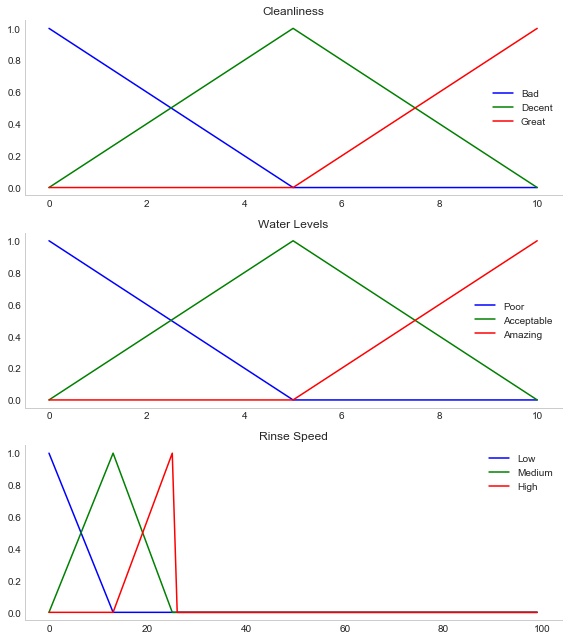

In [141]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_dirt, dirt_low, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_dirt, dirt_med, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_dirt, dirt_high, 'r', linewidth=1.5, label='Great')
ax0.set_title('Cleanliness')
ax0.legend()

ax1.plot(x_water, water_low, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_water, water_med, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_water, water_high, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Water Levels')
ax1.legend()

ax2.plot(y_rinse_speed, rinse_low, 'b', linewidth=1.5, label='Low')
ax2.plot(y_rinse_speed, rinse_med, 'g', linewidth=1.5, label='Medium')
ax2.plot(y_rinse_speed, rinse_high, 'r', linewidth=1.5, label='High')
ax2.set_title('Rinse Speed')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Fuzzy rules

Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

- If the quality of good is bad OR the water-level is poor, then the rinse speed will be low.
- If the water-levels are acceptable, then the speed will be medium
- If the cloth is not clean OR the water-level is amazing, then the speed will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.

### Application:

- Dirt Levels: **6.5**
- Water Level: **9.8**

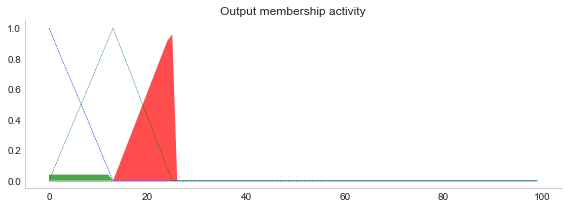

In [143]:
dirt_level_lo = fuzz.interp_membership(x_dirt, dirt_low, 6.5)
dirt_level_md = fuzz.interp_membership(x_dirt, dirt_med, 6.5)
dirt_level_hi = fuzz.interp_membership(x_dirt, dirt_high, 6.5)

water_level_lo = fuzz.interp_membership(x_water, water_low, 9.8)
water_level_md = fuzz.interp_membership(x_water, water_med, 9.8)
water_level_hi = fuzz.interp_membership(x_water, water_high, 9.8)

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(dirt_level_lo, water_level_lo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
rinse_activation_lo = np.fmin(active_rule1, rinse_low)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
rinse_activation_md = np.fmin(water_level_md, rinse_low)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(dirt_level_hi, water_level_hi)
rinse_activation_hi = np.fmin(active_rule3, rinse_high)
rinse0 = np.zeros_like(y_rinse_speed)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(y_rinse_speed, rinse0, rinse_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(y_rinse_speed, rinse_low, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(y_rinse_speed, rinse0, rinse_activation_md, facecolor='g', alpha=0.7)
ax0.plot(y_rinse_speed, rinse_med, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(y_rinse_speed, rinse0, rinse_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(y_rinse_speed, rinse0, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### Defuzzification

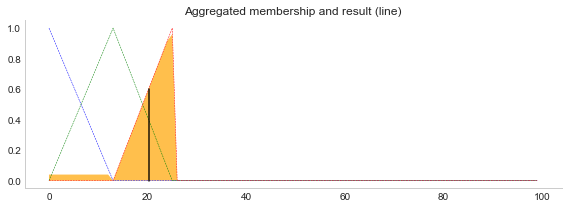

In [144]:
# Aggregate all three output membership functions together
aggregated = np.fmax(rinse_activation_lo,
                     np.fmax(rinse_activation_md, rinse_activation_hi))

# Calculate defuzzified result
rinse = fuzz.defuzz(y_rinse_speed, aggregated, 'centroid')
rinse_activation = fuzz.interp_membership(y_rinse_speed, aggregated, rinse)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(y_rinse_speed, rinse_low, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(y_rinse_speed, rinse_med, 'g', linewidth=0.5, linestyle='--')
ax0.plot(y_rinse_speed, rinse_high, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(y_rinse_speed, rinse0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([rinse, rinse], [0, rinse_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()